In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

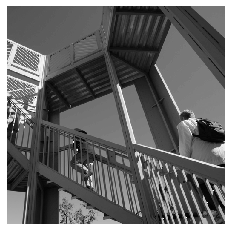

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

The image is stored as a numpy array so we can create the transformed image by just copying that array. Let's also get the dimsneions of th image so we can loop over it later:

In [7]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
print(size_x,",",size_y)

512 , 512


Now we can create a filter as a 3x3 array

In [21]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines
# Experiment with different values for fun effect,
#filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun:
filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you should
# probably do a weight to get it to do so. So, for example, if your weights are
# 1,1,1, 1,2,1, 1,1,1. They add up to 10, you would set a weight of 0.1. If you
# want to normalize them.
weight = 1

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

In [22]:
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x+1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution + weight
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        i_transformed[x, y] = convolution

Now we can plot the image to see the effect of the convolution!

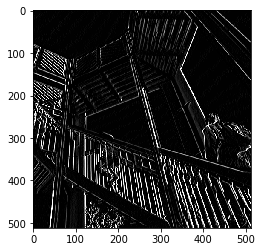

In [23]:
# Plot the image. Note the size of the axes --> they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

### Now let's take a look at pooling

This code will show a (2,2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old - with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

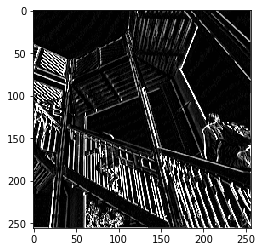

In [24]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        pixels.sort(reverse = True)
        newImage[int(x/2), int(y/2)] = pixels[0]
        
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

Running this Pooling layer we can see that the features obtained in the convolution layer have not only been maintained but have been emphasied

## Lode's Computer Graphics Tutorial
### Image Filtering
https://lodev.org/cgtutor/filtering.html